In [ ]:

file_path = "kangaroo_softmax_lr_0.00025_llr_0.00025_blr_0.00025_gamma_0.99\
_bentcoef_0.01_numenvs_60_steps_128_pretrained_False_joint_True_0"


agent_path="out/runs/kangaroo_softmax_lr_0.00025_llr_0.00025_blr_0.00025_gamma_0.99_bentcoef_0.0_numenvs_60_steps_128_pretrained_False_joint_True_20",

In [11]:
env = "kangaroo"
blend_function = "softmax"
lr = 2.5e-4
llr = 2.5e-4
blr = 2.5e-4
gamma = 0.99
bentcoef = 0.0
num_envs = 60
steps = 128
pretrained = False
joint = True
seeds = [0, 50, 100]
seeds = [20]


In [12]:
import pickle
episodic_returns_list = []
episodic_lengths_list = []
value_losses_list = []
policy_losses_list = []
entropies_list = []
blend_entropies_list = []

for seed in seeds:
    dir_name = f"{env}_{blend_function}_lr_{lr}_llr_{llr}_blr_{blr}_gamma_{gamma}_bentcoef_{bentcoef}_numenvs_{num_envs}_steps_{steps}_pretrained_{pretrained}_joint_{joint}_{seed}"
    base_dir_path = "../out/runs/{}/checkpoints/".format(dir_name)
    file_path = base_dir_path + "training_log.pkl"
    with open(file_path, "rb") as f:
            episodic_returns, episodic_lengths, value_losses, policy_losses, entropies, blend_entropies = pickle.load(f)
            # append to list 
            episodic_returns_list.append(episodic_returns)
            episodic_lengths_list.append(episodic_lengths)
            value_losses_list.append(value_losses)
            policy_losses_list.append(policy_losses)
            entropies_list.append(entropies)
            blend_entropies_list.append(blend_entropies)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [14]:
df_rewards = pd.DataFrame(episodic_returns_list).astype(float).T



In [15]:
# apply smoothing
# df_rewards_smooth = df_rewards.rolling(window=200).mean()


def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return pd.DataFrame(smoothed)


df_rewards_smooth = []
for _, rewards in df_rewards.items():
    df_rewards_smooth.append(smooth(rewards, 0.99))
df_rewards_smooth = pd.concat(df_rewards_smooth, axis=1)

In [16]:
mean = df_rewards_smooth.mean(axis=1)
std = df_rewards_smooth.std(axis=1)

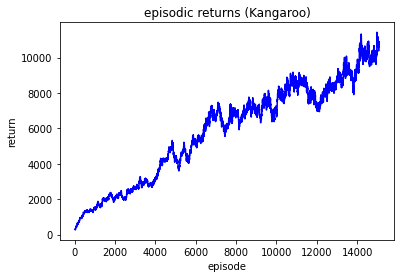

In [32]:

plt.figure()
plt.title("episodic returns (Kangaroo)")
plt.xlabel("episode")
plt.ylabel("return")
plt.plot(mean.index, mean, "b")
plt.fill_between(std.index, mean - 2 * std, mean + 2 * std, color="b", alpha=0.2)

In [41]:
episodic_returns_list = []
episodic_lengths_list = []
value_losses_list = []
policy_losses_list = []
entropies_list = []
blend_entropies_list = []
seeds = [0 , 50, 100]
for seed in seeds:
    dir_name = f"{env}_{blend_function}_lr_{lr}_llr_{llr}_gamma_{gamma}_numenvs_{num_envs}_steps_{steps}_{seed}"
    base_dir_path = "../out_nudge/runs/{}/checkpoints/".format(dir_name)
    file_path = base_dir_path + "training_log.pkl"
    with open(file_path, "rb") as f:
            print(file_path)
            episodic_returns, episodic_lengths, value_losses, policy_losses, entropies, blend_entropies = pickle.load(f)
            # append to list 
            episodic_returns_list.append(episodic_returns)
            episodic_lengths_list.append(episodic_lengths)
            value_losses_list.append(value_losses)
            policy_losses_list.append(policy_losses)
            entropies_list.append(entropies)
            blend_entropies_list.append(blend_entropies)
            
            
nudge_df_rewards = pd.DataFrame(episodic_returns_list).astype(float).T[:15000]
nudge_df_rewards_smooth = []
print(nudge_df_rewards)
for _, rewards in ppo_df_rewards.items():
    ppo_df_rewards_smooth.append(smooth(rewards, 0.99))
ppo_df_rewards_smooth = pd.concat(ppo_df_rewards_smooth, axis=1)

ppo_mean = ppo_df_rewards_smooth.mean(axis=1)
ppo_std = nudge_df_rewards_smooth.std(axis=1)


../out_nudge/runs/kangaroo_softmax_lr_0.00025_llr_0.00025_gamma_0.99_numenvs_60_steps_128_0/checkpoints/training_log.pkl
../out_nudge/runs/kangaroo_softmax_lr_0.00025_llr_0.00025_gamma_0.99_numenvs_60_steps_128_50/checkpoints/training_log.pkl
../out_nudge/runs/kangaroo_softmax_lr_0.00025_llr_0.00025_gamma_0.99_numenvs_60_steps_128_100/checkpoints/training_log.pkl
            0       1        2
0       800.0   600.0    700.0
1      2500.0   300.0    600.0
2       800.0   600.0    700.0
3      2500.0   800.0   1000.0
4       800.0   800.0    700.0
...       ...     ...      ...
14995  4700.0   400.0   8800.0
14996  2200.0   600.0    800.0
14997  2500.0  2600.0  14300.0
14998  2700.0  2400.0    500.0
14999  6200.0  2400.0   2500.0

[15000 rows x 3 columns]


In [55]:
episodic_returns_list = []
episodic_lengths_list = []
value_losses_list = []
policy_losses_list = []
entropies_list = []
blend_entropies_list = []
seeds = [0 , 50, 100]
# kangaroo_softmax_lr_0.00025_gamma_0.99_numenvs_4_steps_128_0
for seed in seeds:
    dir_name = f"{env}__lr_{lr}_gamma_{gamma}_numenvs_{num_envs}_steps_{steps}_{seed}"
    base_dir_path = "../out_neuralppo/runs/{}/checkpoints/".format(dir_name)
    file_path = base_dir_path + "training_log.pkl"
    with open(file_path, "rb") as f:
            print(file_path)
            episodic_returns, episodic_lengths, value_losses, policy_losses, entropies, blend_entropies = pickle.load(f)
            # append to list 
            episodic_returns_list.append(episodic_returns)
            episodic_lengths_list.append(episodic_lengths)
            value_losses_list.append(value_losses)
            policy_losses_list.append(policy_losses)
            entropies_list.append(entropies)
            blend_entropies_list.append(blend_entropies)
            
            
ppo_df_rewards = pd.DataFrame(episodic_returns_list).astype(float).T[:15000]
ppo_df_rewards_smooth = []
print(ppo_df_rewards)
for _, rewards in ppo_df_rewards.items():
    ppo_df_rewards_smooth.append(smooth(rewards, 0.99))
ppo_df_rewards_smooth = pd.concat(ppo_df_rewards_smooth, axis=1)

ppo_mean = ppo_df_rewards_smooth.mean(axis=1)
ppo_std = ppo_df_rewards_smooth.std(axis=1)

../out_neuralppo/runs/kangaroo__lr_0.00025_gamma_0.99_numenvs_60_steps_128_0/checkpoints/training_log.pkl
../out_neuralppo/runs/kangaroo__lr_0.00025_gamma_0.99_numenvs_60_steps_128_50/checkpoints/training_log.pkl
../out_neuralppo/runs/kangaroo__lr_0.00025_gamma_0.99_numenvs_60_steps_128_100/checkpoints/training_log.pkl
            0        1        2
0       200.0    400.0      0.0
1       100.0    200.0    300.0
2       200.0    100.0    300.0
3       300.0    300.0    200.0
4       100.0    300.0    200.0
...       ...      ...      ...
14995  1900.0    200.0  11900.0
14996  4000.0    400.0   7900.0
14997  2000.0   2600.0   9700.0
14998  5900.0   2100.0   7000.0
14999  4000.0  10200.0   9400.0

[15000 rows x 3 columns]


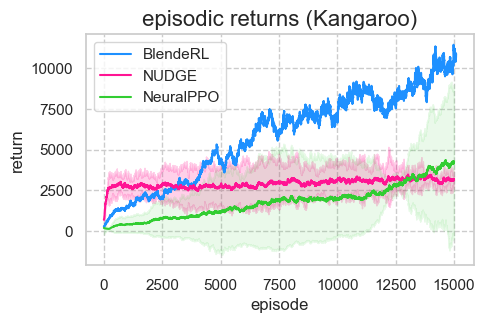

In [91]:
C0 = "dodgerblue"
C2 = "limegreen"
C1 = "deeppink"

plt.style.use('default')
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_palette('Set1')

fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111, label="1")


# plt.figure()
# ax.title("episodic returns (Kangaroo)")
plt.title("episodic returns (Kangaroo)", fontsize=16)
plt.xlabel("episode")
plt.ylabel("return")
plt.plot(mean.index, mean, color=C0, label="BlendeRL")
plt.fill_between(std.index, mean - 2 * std, mean + 2 * std, color=C0, alpha=0.2)
plt.plot(nudge_mean.index, nudge_mean, color=C1, label="NUDGE")
plt.fill_between(nudge_std.index, nudge_mean - 2 * nudge_std, nudge_mean + 2 * nudge_std, color=C1, alpha=0.2)
plt.plot(ppo_mean.index, ppo_mean, color=C2, label="NeuralPPO")
plt.fill_between(ppo_std.index, ppo_mean - 2 * ppo_std, ppo_mean + 2 * ppo_std, color=C2, alpha=0.1)

plt.legend()

plt.tight_layout()
plt.savefig("figures/returns_{}.pdf".format(env), bbox_inches='tight')

In [89]:
means = pd.concat([mean, nudge_mean, ppo_mean], axis=1)
stds = pd.concat([std, nudge_std, ppo_std], axis=1)
means.columns = ["BlendeRL", "NUDGE", "Neural PPO"]
stds.columns = ["BlendeRL", "NUDGE", "Neural PPO"]

<AxesSubplot:>

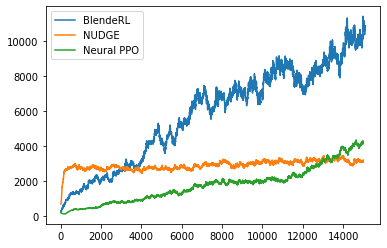

In [58]:
import seaborn as sns

means.plot()

In [22]:
std

0        152.752523
1        152.752523
2        907.377173
3        200.000000
4       1096.965511
           ...     
3995    1096.965511
3996    4880.915215
3997    3121.431296
3998    2003.330560
3999    2936.551265
Length: 4000, dtype: float64

<AxesSubplot:>

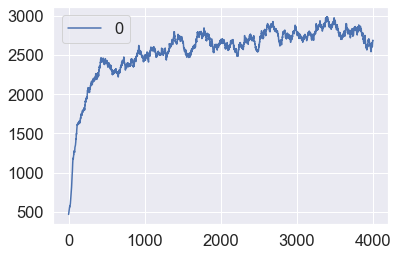

In [40]:
smooth(mean, 0.99).plot()

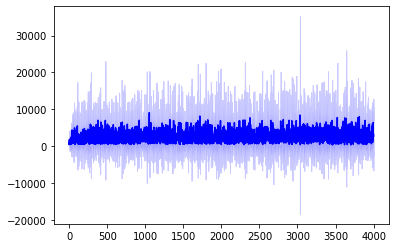

In [29]:
def plot_data(data, xaxis='Epoch', value="AverageEpRet", condition="Condition1", smooth=1, **kwargs):
    if smooth > 1:
        """
        smooth data with moving window average.
        that is,
            smoothed_y[t] = average(y[t-k], y[t-k+1], ..., y[t+k-1], y[t+k])
        where the "smooth" param is width of that window (2k+1)
        """
        y = np.ones(smooth)
        for datum in data:
            x = np.asarray(datum[value])
            z = np.ones(len(x))
            smoothed_x = np.convolve(x,y,'same') / np.convolve(z,y,'same')
            datum[value] = smoothed_x

    if isinstance(data, list):
        data = pd.concat(data, ignore_index=True)
    sns.set(style="darkgrid", font_scale=1.5)
    # sns.tsplot(data=data, time=xaxis, value=value, unit="Unit", condition=condition, ci='sd', **kwargs)
    sns.lineplot(data=data, x=xaxis, y=value, hue=condition, ci='sd', **kwargs)

    """
    If you upgrade to any version of Seaborn greater than 0.8.1, switch from 
    tsplot to lineplot replacing L29 with:

        sns.lineplot(data=data, x=xaxis, y=value, hue=condition, ci='sd', **kwargs)

    Changes the colorscheme and the default legend style, though.
    """
    plt.legend(loc='best').set_draggable(True)
    #plt.legend(loc='upper center', ncol=3, handlelength=1,
    #           borderaxespad=0., prop={'size': 13})

    """
    For the version of the legend used in the Spinning Up benchmarking page, 
    swap L38 with:

    plt.legend(loc='upper center', ncol=6, handlelength=1,
               mode="expand", borderaxespad=0., prop={'size': 13})
    """

    xscale = np.max(np.asarray(data[xaxis])) > 5e3
    if xscale:
        # Just some formatting niceness: x-axis scale in scientific notation if max x is large
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    plt.tight_layout(pad=0.5)

<AxesSubplot:>

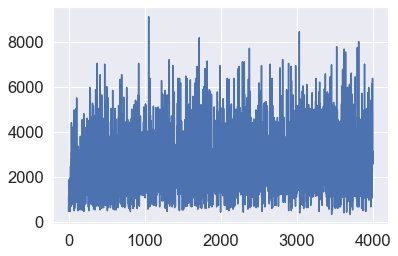

In [34]:
mean.interpolate('pchip', order=2).plot()